In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from prettytable import PrettyTable 
import warnings
warnings.filterwarnings('ignore') #Importing the necessary libraries

In [2]:
Data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv") # Loading the dataset

In [3]:
Data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
Data.shape # checking the total number of rows and columns

(7043, 21)

In [5]:
Data.columns #checking the total number of columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
Data.info() #checking the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Except monthly charges,Senior citizen and tenure all are object data type and needs to be encoded

In [8]:
Data.isnull().sum() #Checking for null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# No null values

In [10]:
Data.drop('customerID',axis=1,inplace=True ) #dropping customer ID as it will have no contribution on churn prediction

### Checking the values and unique count of all the columns

In [11]:
# First,Checking with the non object data type

In [12]:
Data['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [13]:
Data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='SeniorCitizen'>

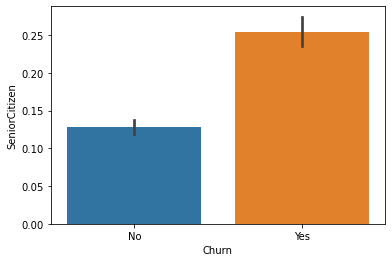

In [14]:
sns.barplot(y='SeniorCitizen',x='Churn',data=Data)

In [15]:
# Observation: Churn rate is higher for senior citizen and majority of the customers are young

In [16]:
Data['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [17]:
Data['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

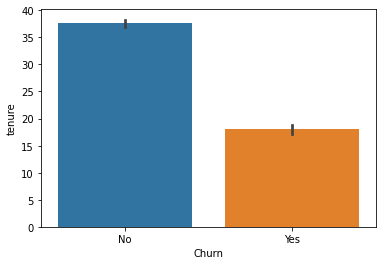

In [18]:
sns.barplot(y='tenure',x='Churn',data=Data)

In [19]:
#Higher churn rate is observed for customers who have a subscription of less than 20 months (1.5 years)

In [20]:
Data['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [21]:
Data['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

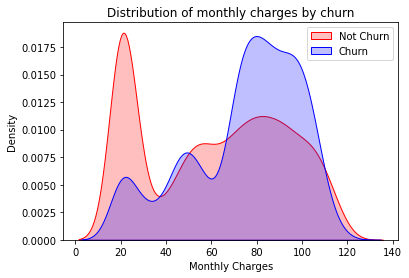

In [22]:
ax = sns.kdeplot(Data.MonthlyCharges[(Data["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(Data.MonthlyCharges[(Data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

In [23]:
# Observation: Churn rate is more for higher rates between 60-100

In [24]:
# Now with Object Data types

In [25]:
Data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [26]:
Data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [27]:
Data['gender']=Data['gender'].replace({'Male':1,'Female':0})

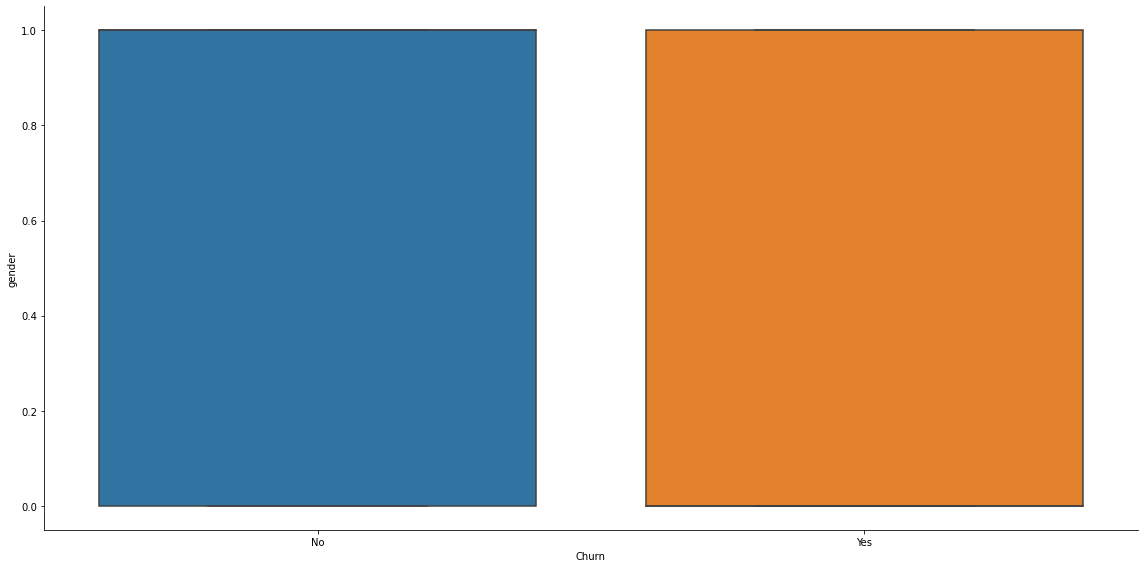

In [28]:
sns.catplot(x='Churn',y='gender',data=Data,kind='box',height=8,aspect=2)

In [29]:
# Gender has not much influence for identifying the churn rate

In [30]:
Data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [31]:
Data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
Data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [33]:
Data['Partner']=Data['Partner'].replace({'Yes':1,'No':0})

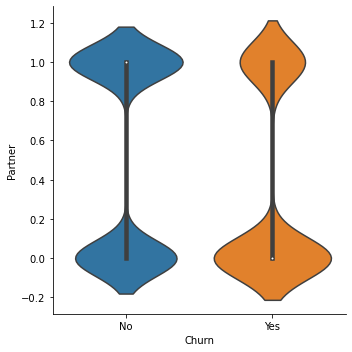

In [34]:
sns.catplot(x='Churn',y='Partner',data=Data,kind='violin')

In [35]:
# No fixed pattern can be observed for partners while churning

In [36]:
Data['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [37]:
Data['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [38]:
# Majority of the customers are non dependent

In [39]:
Data['Dependents']=Data['Dependents'].replace({'No':0,'Yes':1})

<AxesSubplot:xlabel='Churn', ylabel='Dependents'>

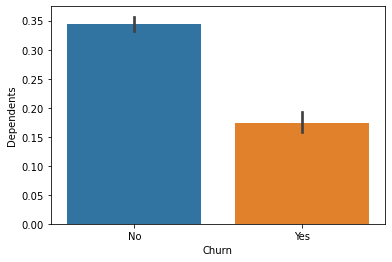

In [40]:
sns.barplot(x='Churn',y='Dependents',data=Data)

In [41]:
# Churn rate is affected by people who are non depended. However the count for such is less as compared not churned

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

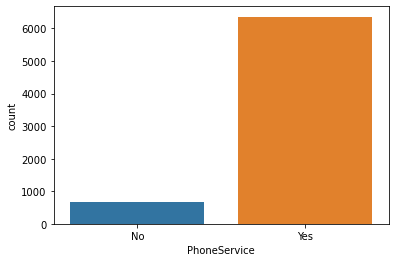

In [42]:
sns.countplot(Data['PhoneService'])

In [43]:
# Majority people have phone service

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

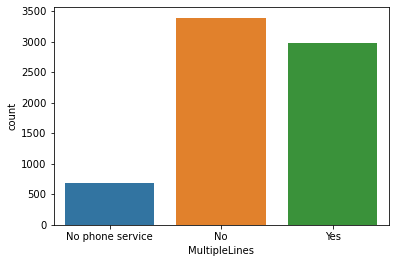

In [44]:
sns.countplot(Data['MultipleLines'])

In [45]:
#Maximum people do not have a multiple line

<AxesSubplot:xlabel='InternetService', ylabel='count'>

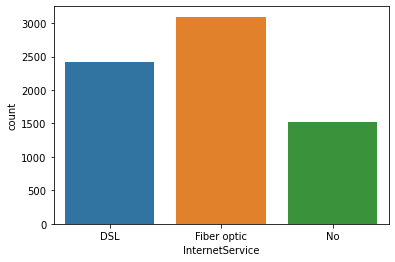

In [46]:
sns.countplot(Data['InternetService'])

In [47]:
#Majority have opted for fibre optic Internet Service which gives faster connection

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

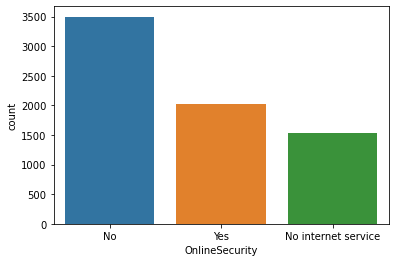

In [48]:
sns.countplot(Data['OnlineSecurity'])

In [49]:
# Maximum people does not have online security which can be a reason for churning

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

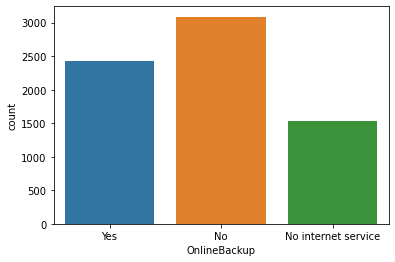

In [50]:
sns.countplot(Data['OnlineBackup'])

In [51]:
# Maximum people does not have online backup which can be a reason for churning

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

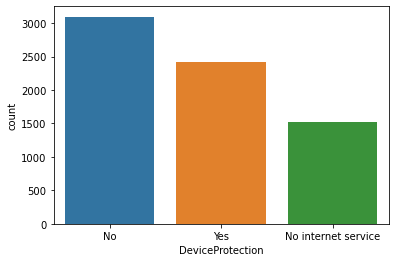

In [52]:
sns.countplot(Data['DeviceProtection'])

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

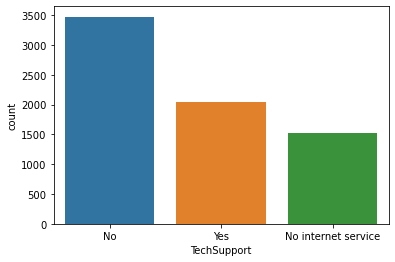

In [53]:
sns.countplot(Data['TechSupport'])

In [54]:
# Maximum people does not have technical support which can be a reason for churning

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

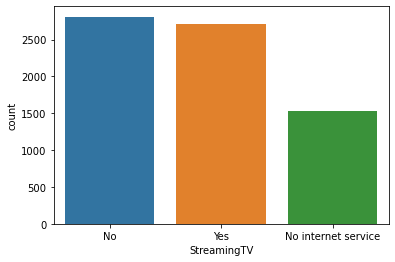

In [55]:
sns.countplot(Data['StreamingTV'])

In [56]:
# There is a slight difference in people have streaming TV and not having steaming TV. However majority population does not have it

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

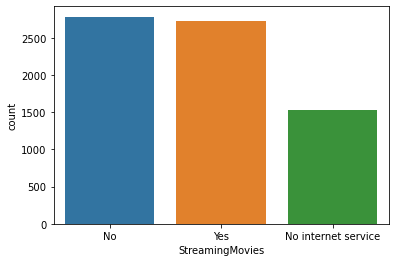

In [57]:
sns.countplot(Data['StreamingMovies'])

In [58]:
# There is a slight difference in people have streaming movies and not having steaming movies. However majority population does not have it

<AxesSubplot:xlabel='Contract', ylabel='count'>

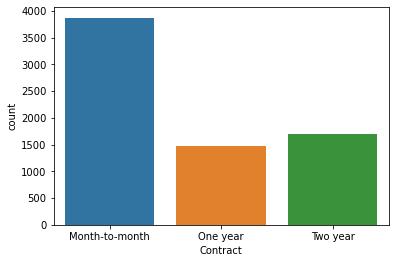

In [59]:
sns.countplot(Data['Contract'])

In [60]:
# Majority of people have opted for Month to Month contract

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

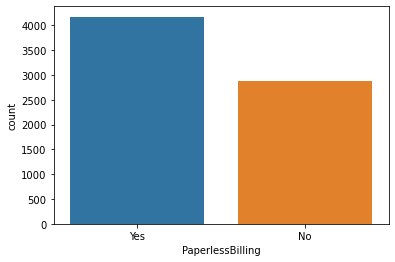

In [61]:
sns.countplot(Data['PaperlessBilling'])

In [62]:
# People usually prefer Paperless Billing

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

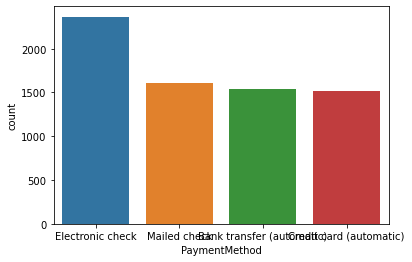

In [63]:
sns.countplot(Data['PaymentMethod'])

In [64]:
# Electronic check is more in demand as a payment method

In [65]:
# Converting total charges into numerical data type
Data['TotalCharges']=pd.to_numeric(Data['TotalCharges'],errors='coerce')

In [66]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [67]:
Data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [68]:
Data.dropna(axis=0,inplace=True) #dropping the null values

In [69]:
Data.reset_index()

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,0,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,1,0,0,0,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,1,0,0,0,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,1,0,0,0,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,0,0,0,0,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,1,0,1,1,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,7039,0,0,1,1,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,7040,0,0,1,1,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,7041,1,1,1,0,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [70]:
Data['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [71]:
Data['Churn']=Data['Churn'].replace({'No':0,'Yes':1})

In [72]:
Data_dummies = pd.get_dummies(Data)
Data_dummies.head() # Getting the dummies of all categorical data type

,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,Churn,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,29.85,29.85,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,1,0,0,0,34,56.95,1889.50,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,1,0,0,0,2,53.85,108.15,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,45,42.30,1840.75,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,0,0,0,2,70.70,151.65,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

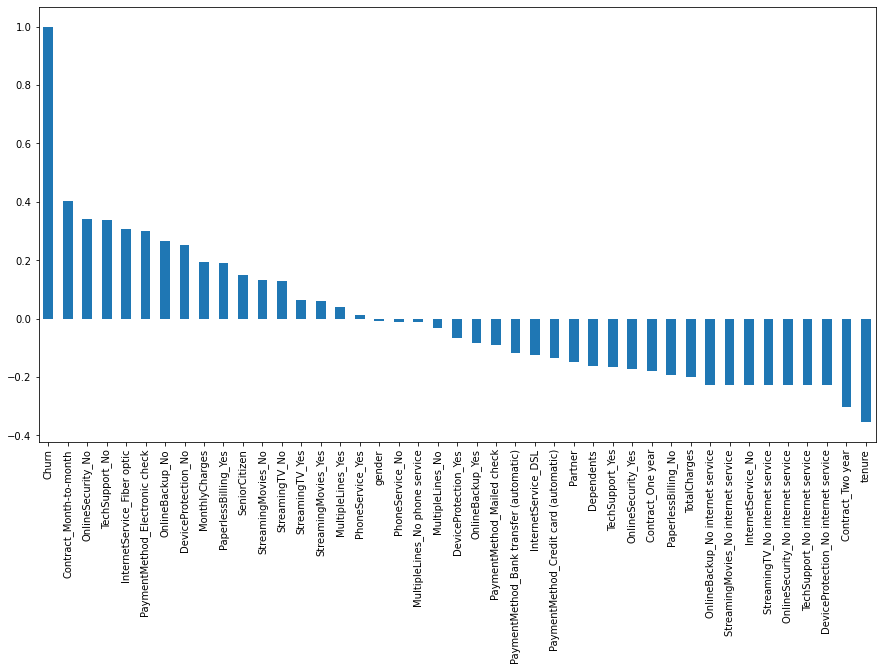

In [73]:
# getting corelation of all the above categorical data with Churning
plt.figure(figsize=(15,8))
Data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

### From the above data it can be said that: Month to month contract, no online security, no technical support, no online backup, no device protection,paperless biling, fiber optic connection,are the main result in customer churning.

### A two year contract results in negative churning

In [74]:
enc= LabelEncoder() #Encoding the object data type

In [75]:
columns=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
Data[columns] = Data[columns].apply(enc.fit_transform) #Encoding the object data type into int data type

In [76]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  


In [77]:
Data['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [78]:
# The above data shows an imbalanced class which might make the model biased

In [79]:
from sklearn.utils import resample

In [80]:
not_churn=Data[Data.Churn==0]
churn=Data[Data.Churn==1]

In [81]:
churn_upsamples=resample(churn,replace=True,n_samples=len(not_churn),random_state=27)

In [82]:
upsampled=pd.concat([not_churn,churn_upsamples])

In [83]:
Data=upsampled

In [84]:
Data['Churn'].value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [85]:
# Class has now been balanced

In [86]:
Data.shape #checking the shape

(10326, 20)

In [87]:
Data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000
mean,0.498451,0.190587,0.444703,0.262929,27.726128,0.900445,0.948673,0.847569,0.655142,0.815902,0.816870,0.671412,0.967558,0.968332,0.510362,0.642069,1.629576,67.607868,2029.104668,0.500000
std,0.500022,0.392783,0.496957,0.440245,23.949522,0.299420,0.947575,0.678702,0.845839,0.894699,0.894898,0.852292,0.912869,0.912896,0.769918,0.479415,1.020190,28.728383,2167.519584,0.500024
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,45.300000,276.975000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,21.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,74.400000,1164.925000,0.500000
75%,1.000000,0.000000,1.000000,1.000000,49.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,90.500000,3207.062500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [88]:
X=Data.drop('Churn',axis=1)
Y=Data['Churn'] #Seperating the target and classes

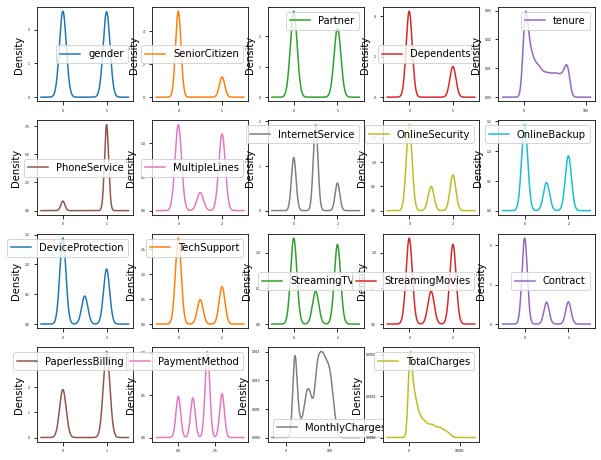

In [89]:
X.plot(kind='kde',subplots=True,layout=(4,5),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() # ploting the data and observing high skewness

In [90]:
# Apart from Total Charges, monthly charges and tenure, data does not look much skewed,

In [91]:
X.skew().sort_values(ascending=False) #Checking the skewness

SeniorCitizen       1.575797
TotalCharges        1.130010
Contract            1.092372
Dependents          1.077206
OnlineSecurity      0.721125
TechSupport         0.683249
tenure              0.509072
OnlineBackup        0.369006
DeviceProtection    0.367002
Partner             0.222587
InternetService     0.197528
MultipleLines       0.102346
StreamingTV         0.064023
StreamingMovies     0.062493
gender              0.006199
PaymentMethod      -0.315691
MonthlyCharges     -0.380260
PaperlessBilling   -0.592789
PhoneService       -2.675329
dtype: float64

In [92]:
from sklearn.preprocessing import power_transform

In [93]:
New_X=power_transform(X)

In [94]:
pd.DataFrame(New_X,columns=X.columns).skew().sort_values(ascending=False) # transforming the data to reduce skewness

SeniorCitizen       1.575797
Dependents          1.077206
Contract            0.703997
OnlineSecurity      0.426718
TechSupport         0.398343
Partner             0.222587
OnlineBackup        0.166098
DeviceProtection    0.164639
MultipleLines       0.018221
gender              0.006199
StreamingTV        -0.051974
StreamingMovies    -0.053046
InternetService    -0.077439
TotalCharges       -0.123841
tenure             -0.161667
PaymentMethod      -0.231691
MonthlyCharges     -0.291407
PaperlessBilling   -0.592789
PhoneService       -2.675329
dtype: float64

In [95]:
X=pd.DataFrame(New_X,columns=X.columns)

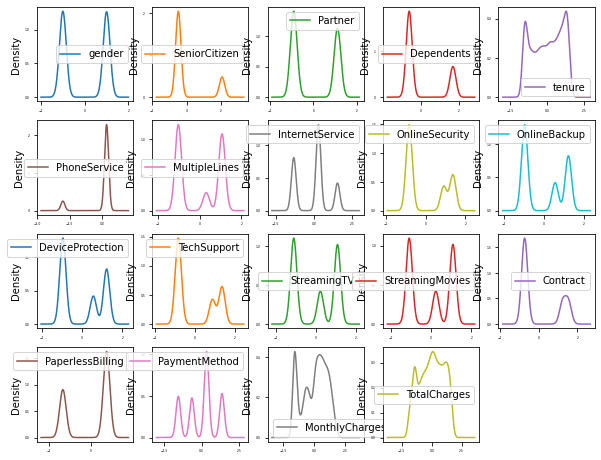

In [96]:
X.plot(kind='kde',subplots=True,layout=(4,5),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() # checking data after transformation

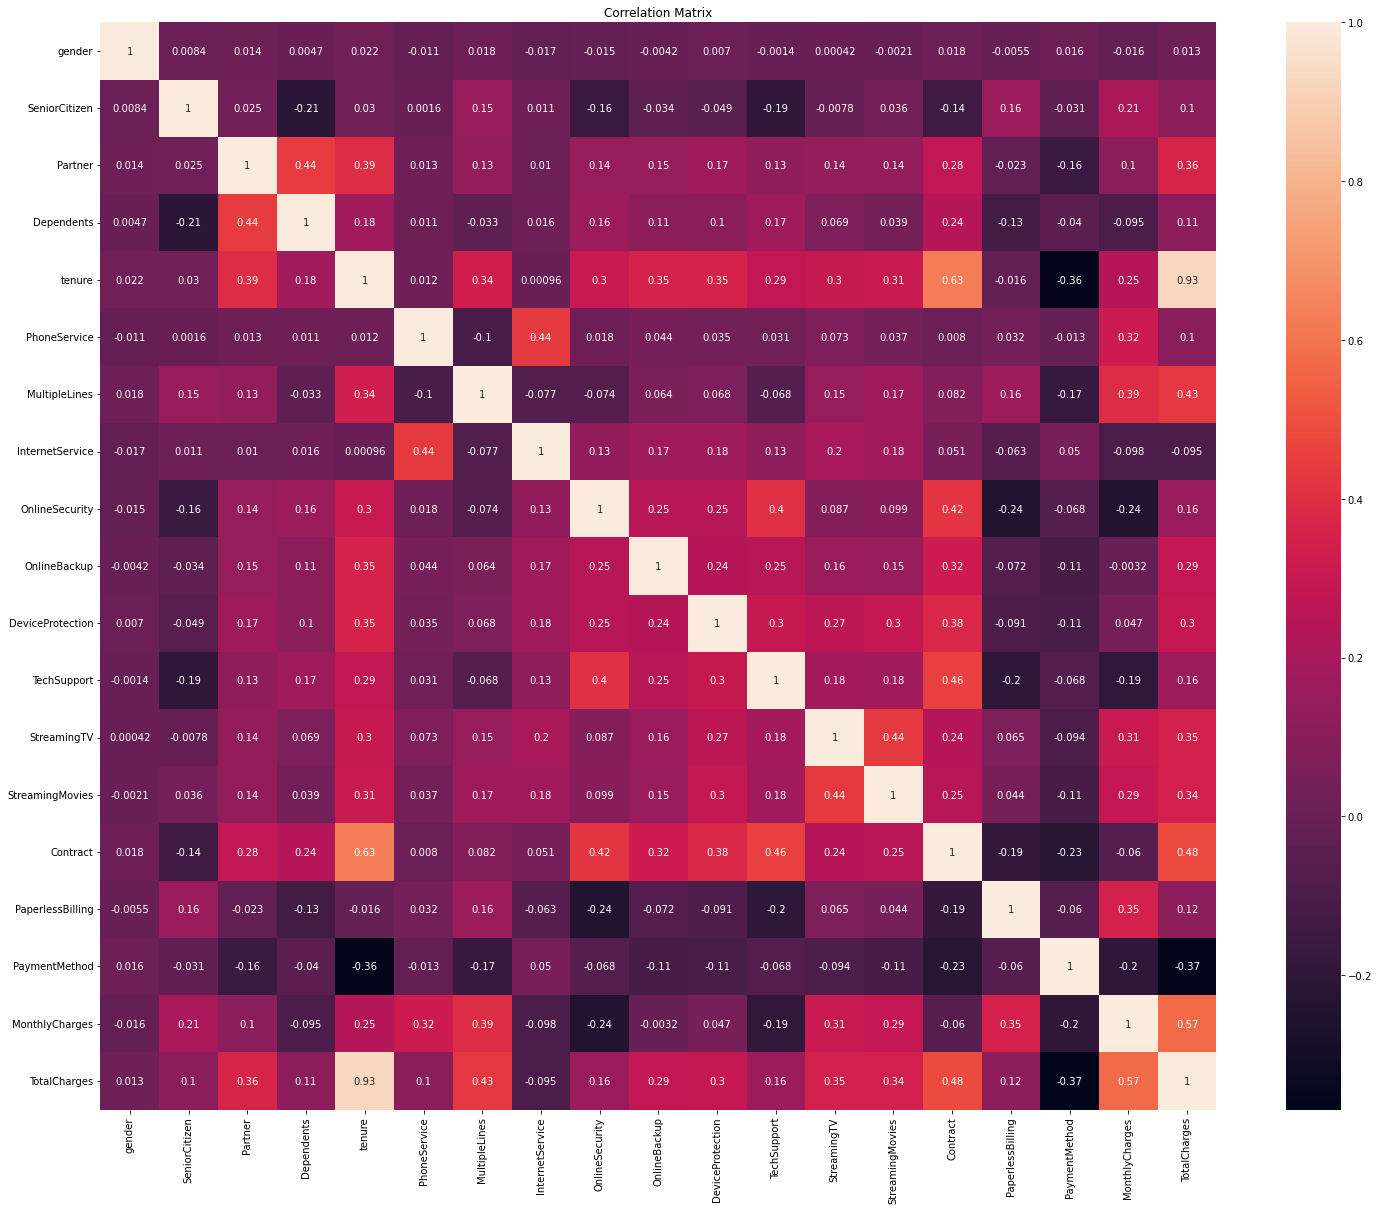

In [97]:
corr_mat=X.corr()
plt.figure(figsize=[25,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show() #Checking correlation of the feature variables

In [98]:
# From the heat map it can be said- Tenurity is corelated with Total Charges, therefore checking with VIF features

In [99]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,gender,1.003860
1,SeniorCitizen,1.156114
2,Partner,1.449479
3,Dependents,1.366956
4,tenure,77.647600
5,PhoneService,1.753336
6,MultipleLines,1.395533
7,InternetService,1.994884
8,OnlineSecurity,1.445802
9,OnlineBackup,1.228936


In [100]:
# As per the conclusions drawn above, increase in monthly charge results in an increase in total charge
# Churn is more impacted with an increase in monthly charge than an increase in total charge.
# The VIF for total charges is the highest.
# Therefore based on the above conclusions, Total Charges column is dropped off.

In [101]:
X.drop('TotalCharges',axis=1,inplace=True)

In [102]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,gender,1.003860
1,SeniorCitizen,1.156051
2,Partner,1.449248
3,Dependents,1.366651
4,tenure,2.508756
5,PhoneService,1.750121
6,MultipleLines,1.395416
7,InternetService,1.624516
8,OnlineSecurity,1.443273
9,OnlineBackup,1.228559


In [103]:
# VIF is now controlled

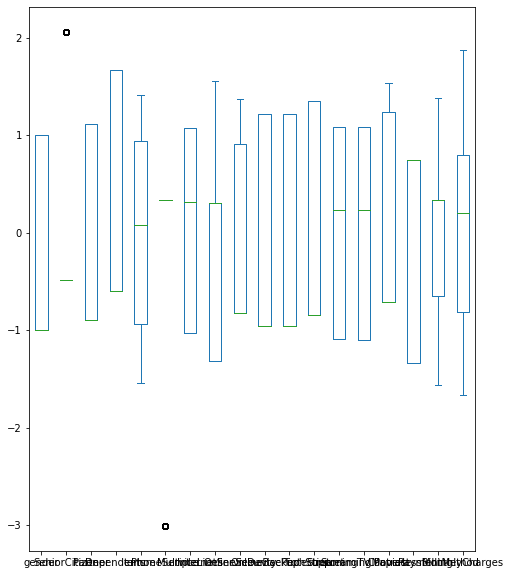

In [104]:
X.plot(kind='box',figsize=(8,10),layout=(4,3))
plt.show() #checking for oultiers

In [105]:
from scipy.stats import zscore

In [106]:
(np.abs(zscore(X)<3)).all() #checking the presence of any Outlier with zscore

gender              True
SeniorCitizen       True
Partner             True
Dependents          True
tenure              True
PhoneService        True
MultipleLines       True
InternetService     True
OnlineSecurity      True
OnlineBackup        True
DeviceProtection    True
TechSupport         True
StreamingTV         True
StreamingMovies     True
Contract            True
PaperlessBilling    True
PaymentMethod       True
MonthlyCharges      True
dtype: bool

In [107]:
# No Outliers present

In [108]:
Scalar=StandardScaler() #scaling the data

In [109]:
X_Scaled=Scalar.fit_transform(X)
#scaling the features

# Logistic Regression

In [110]:
LR=LogisticRegression()

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=58)
LR.fit(X_train,y_train)
pred_test=LR.predict(X_test) # Testing the prediction of test data

In [112]:
LR_accuracy=accuracy_score(y_test,pred_test)*100
LR_accuracy

76.42787996127784

In [113]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[786, 285],
       [202, 793]], dtype=int64)

In [114]:
print (classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1071
           1       0.74      0.80      0.77       995

    accuracy                           0.76      2066
   macro avg       0.77      0.77      0.76      2066
weighted avg       0.77      0.76      0.76      2066



# Decision Tree

In [115]:
DT=DecisionTreeClassifier()

In [116]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=58)
DT.fit(X_train,y_train)
pred_test=DT.predict(X_test) # Testing the prediction of test data

In [117]:
DT_accuracy=accuracy_score(y_test,pred_test)*100
DT_accuracy

87.1732817037754

In [118]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[860, 211],
       [ 54, 941]], dtype=int64)

In [119]:
print (classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87      1071
           1       0.82      0.95      0.88       995

    accuracy                           0.87      2066
   macro avg       0.88      0.87      0.87      2066
weighted avg       0.88      0.87      0.87      2066



# Random Forest Classifier

In [120]:
RF=RandomForestClassifier()

In [121]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=58)
RF.fit(X_train,y_train)
pred_test=RF.predict(X_test) # Testing the prediction of test data

In [122]:
RF_accuracy=accuracy_score(y_test,pred_test)*100
RF_accuracy

89.69022265246855

In [123]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[901, 170],
       [ 43, 952]], dtype=int64)

In [124]:
print (classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1071
           1       0.85      0.96      0.90       995

    accuracy                           0.90      2066
   macro avg       0.90      0.90      0.90      2066
weighted avg       0.90      0.90      0.90      2066



# Gradient Boosting

In [125]:
GB=GradientBoostingClassifier()

In [126]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=58)
GB.fit(X_train,y_train)
pred_test=GB.predict(X_test) # Testing the prediction of test data

In [127]:
GB_accuracy=accuracy_score(y_test,pred_test)*100
GB_accuracy

77.29912875121006

In [128]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[768, 303],
       [166, 829]], dtype=int64)

In [129]:
print (classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1071
           1       0.73      0.83      0.78       995

    accuracy                           0.77      2066
   macro avg       0.78      0.78      0.77      2066
weighted avg       0.78      0.77      0.77      2066



# Cross Validation for LR

In [130]:
for i in range(2,6):
    LR_Val=cross_val_score(LR,X_Scaled,Y,cv=i)
    print("The cross validation score for",i,"is",LR_Val.mean())

The cross validation score for 2 is 0.7678675188843695
The cross validation score for 3 is 0.7692233197753243
The cross validation score for 4 is 0.7691263931650916
The cross validation score for 5 is 0.7681586108773665


# Cross Validation for DT

In [131]:
for i in range(2,6):
    DT_Val=cross_val_score(DT,X_Scaled,Y,cv=i)
    print("The cross validation score for",i,"is",DT_Val.mean())

The cross validation score for 2 is 0.8252953709083866
The cross validation score for 3 is 0.8526050745690491
The cross validation score for 4 is 0.8619975009536112
The cross validation score for 5 is 0.8657764943311401


# Cross Validation for RF

In [132]:
for i in range(2,6):
    RF_Val=cross_val_score(RF,X_Scaled,Y,cv=i)
    print("The cross validation score for",i,"is",RF_Val.mean())

The cross validation score for 2 is 0.8577377493705209
The cross validation score for 3 is 0.8816579508037963
The cross validation score for 4 is 0.8910508659629401
The cross validation score for 5 is 0.8959905210381853


# Cross Validation for GB

In [133]:
for i in range(2,6):
    GB_Val=cross_val_score(GB,X_Scaled,Y,cv=i)
    print("The cross validation score for",i,"is",GB_Val.mean())

The cross validation score for 2 is 0.7810381561107883
The cross validation score for 3 is 0.7833623862095681
The cross validation score for 4 is 0.7815223625186859
The cross validation score for 5 is 0.7825888535472272


In [134]:
# From the accuracy score as well as cross validation scores it can be said Random Forest Classifier is the best model for the dataset

In [135]:
x=PrettyTable()
x.field_names=['Model Name','Accuracy Score','Cross Validation Score']
x.add_row(['Logistic Regression','76%','76%'])
x.add_row(['Decision Tree Classifier','87%','86%'])
x.add_row(['Random Tree Regressor','89%','89%'])
x.add_row(['Gradient Boosting','77%','78%'])

print(x)

+--------------------------+----------------+------------------------+
|        Model Name        | Accuracy Score | Cross Validation Score |
+--------------------------+----------------+------------------------+
|   Logistic Regression    |      76%       |          76%           |
| Decision Tree Classifier |      87%       |          86%           |
|  Random Tree Regressor   |      89%       |          89%           |
|    Gradient Boosting     |      77%       |          78%           |
+--------------------------+----------------+------------------------+


# Hypertuning Parameters

In [136]:
rcf=RandomForestClassifier()

In [137]:
parameters={'criterion':["entropy","ginny"],'max_depth':(list(range(5,15))),'min_samples_split':(list(range(2,4))),'min_samples_leaf':(list(range(2,3)))}
clf=GridSearchCV(rcf,parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'ginny'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'min_samples_leaf': [2], 'min_samples_split': [2, 3]})

In [138]:
clf.best_params_ #taking the best parameters

{'criterion': 'entropy',
 'max_depth': 14,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [139]:
rcf=RandomForestClassifier(criterion='entropy',max_depth=14,min_samples_leaf=2,min_samples_split=3,random_state=58)
rcf.fit(X_train,y_train) # Training the model with the best parameters
pred_test=rcf.predict(X_test) # Testing the prediction 

In [140]:
RF_accuracy=accuracy_score(y_test,pred_test)*100
RF_accuracy

85.6243949661181

In [141]:
# Accuracy got reduced, therefore trying with few more parameters

In [142]:
for i in range(0,100):
    rcf=RandomForestClassifier(max_depth=15,min_samples_leaf=2,min_samples_split=3,random_state=i)
    rcf.fit(X_train,y_train)
    rcf_pred=rcf.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',accuracy_score(y_test,rcf_pred))
    print("/n")

At random state 0 the testing accurancy is:- 0.8523717328170377
/n
At random state 1 the testing accurancy is:- 0.861568247821878
/n
At random state 2 the testing accurancy is:- 0.8606001936108422
/n
At random state 3 the testing accurancy is:- 0.8586640851887706
/n
At random state 4 the testing accurancy is:- 0.8572120038722169
/n
At random state 5 the testing accurancy is:- 0.8620522749273959
/n
At random state 6 the testing accurancy is:- 0.8576960309777347
/n
At random state 7 the testing accurancy is:- 0.8572120038722169
/n
At random state 8 the testing accurancy is:- 0.8601161665053243
/n
At random state 9 the testing accurancy is:- 0.866892545982575
/n
At random state 10 the testing accurancy is:- 0.8591481122942884
/n
At random state 11 the testing accurancy is:- 0.8625363020329139
/n
At random state 12 the testing accurancy is:- 0.8606001936108422
/n
At random state 13 the testing accurancy is:- 0.8576960309777347
/n
At random state 14 the testing accurancy is:- 0.854791868344

In [143]:
# Therefore it can be said that the original accuracy was more than hypertuning, therefore keeping the original accuracy in place

# Saving the model

In [144]:
import pickle
filename='Customer Churn Analysis.pkl'
pickle.dump(RF,open(filename,'wb')) ##saving the model